In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [4]:
#storing the dataset to a dataframe named 'data'
df_1=pd.read_csv('/content/ISIC_2019_Training_GroundTruth.csv')
df_2=pd.read_csv('/content/ISIC_2019_Training_Metadata.csv')

In [5]:
#displaying the first few rows
df_1.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_2.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [7]:
df_1.shape

(25331, 10)

There are 25331 images and 9 classes. 

In [8]:
df_2.shape

(25331, 5)

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB


**Preprocessing**

Handling the missing values

In [11]:
df_2.isnull().sum()

image                     0
age_approx              437
anatom_site_general    2631
lesion_id              2084
sex                     384
dtype: int64

In [12]:
#descriptive statistics
df_2.describe()

,age_approx
count,24894.000000
mean,54.028481
std,18.130971
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,85.000000


In [13]:
#descriptive statistics
df_2.describe(include=object)

,image,anatom_site_general,lesion_id,sex
count,25331,22700,23247,24947
unique,25331,8,11847,2
top,ISIC_0000000,anterior torso,BCN_0001728,male
freq,1,6915,31,13286


There are missing values in the 'anatom_site_general' and 'sex' feature. 

In [14]:
#filling missing values with mode
df_2['anatom_site_general']=df_2['anatom_site_general'].fillna(df_2['anatom_site_general'].mode()[0])
df_2['sex']=df_2['sex'].fillna(df_2['sex'].mode()[0])

#filling missing values in 'age' with median
df_2['age_approx']=df_2['age_approx'].fillna(df_2['age_approx'].median())

Handling outliers

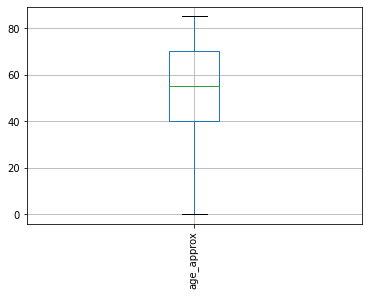

In [15]:
df_2.boxplot(column=['age_approx'])
plt.xticks(rotation=90)
plt.show()

There are no outliers to be handled.

Exploratory Data Analysis

In [16]:
df_1.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
skin_diseas_list=['Melanoma','Melanocytic nevus','Basal cell carcinoma','Actinic keratosis','Benign keratosis','Dermatofibroma','Vascular lesion','Squamous cell carcinoma','Unknown']
cases_count=[]
for col in ['MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK']:
  cases_count.append(df_1[col].sum(axis=0))
cases_count

[4522.0, 12875.0, 3323.0, 867.0, 2624.0, 239.0, 253.0, 628.0, 0.0]

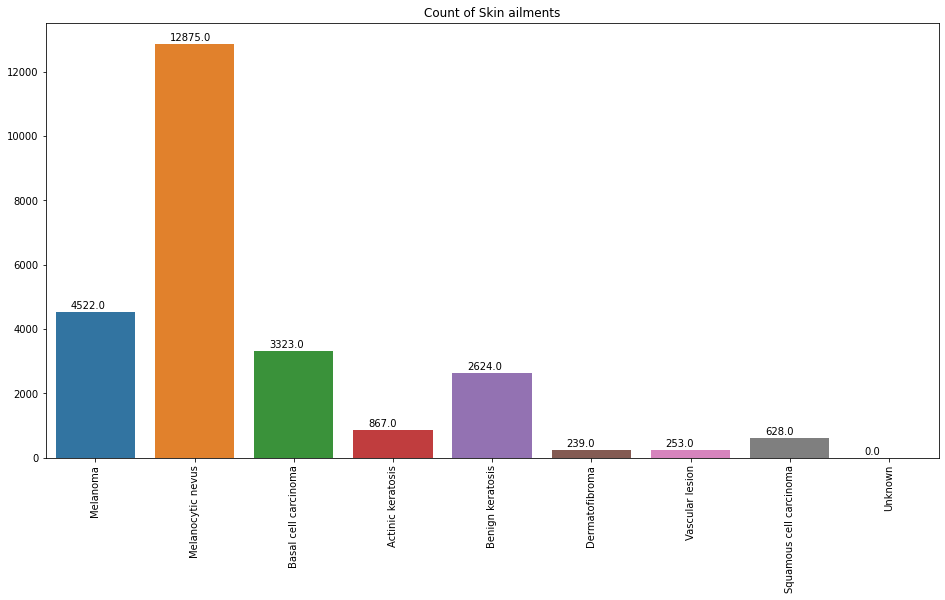

In [18]:
plt.figure(figsize=(16,8))
plt.title('Count of Skin ailments')
fig=sns.barplot(skin_diseas_list,cases_count)
plt.xticks(rotation=90)

#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height(),2) , (p.get_x()+.15, p.get_height()+100))
plt.show()

In [19]:
ailment_list=[]
for ind in df_1.index:
  for col in df_1.columns:
    if df_1.iloc[ind][col]==1:
      ailment_list.append(col)
df_1['target']=ailment_list
df_1.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,target
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [20]:
data=pd.merge(df_1,df_2,on='image')
data.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,target,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,55.0,anterior torso,NaN,female
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,30.0,anterior torso,NaN,female
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,60.0,upper extremity,NaN,female
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,30.0,upper extremity,NaN,male
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,80.0,posterior torso,NaN,male


In [21]:
#dropping unrequired columns
data.drop(['MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK','lesion_id'],axis=1,inplace=True)
data.head()

,image,target,age_approx,anatom_site_general,sex
0,ISIC_0000000,NV,55.0,anterior torso,female
1,ISIC_0000001,NV,30.0,anterior torso,female
2,ISIC_0000002,MEL,60.0,upper extremity,female
3,ISIC_0000003,NV,30.0,upper extremity,male
4,ISIC_0000004,MEL,80.0,posterior torso,male


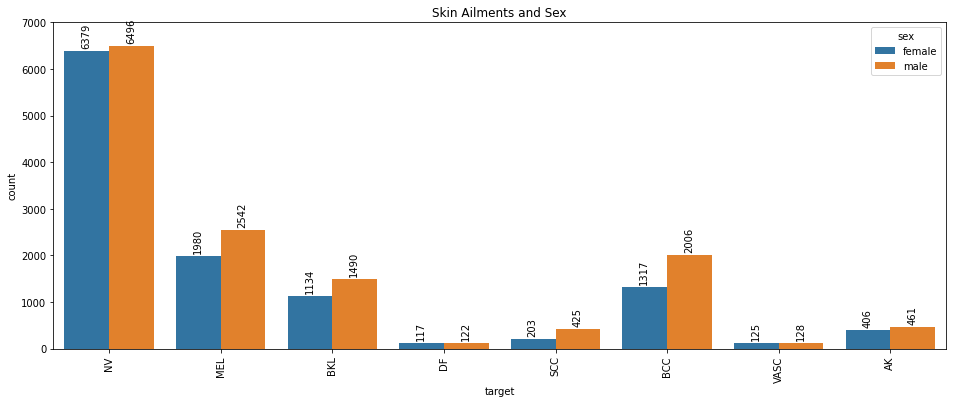

In [22]:
plt.figure(figsize=(16,6))
fig=sns.countplot(x='target',hue='sex',data=data)
plt.title('Skin Ailments and Sex')
plt.xticks(rotation=90)
plt.ylim(0,7000)
#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height(),2) , (p.get_x()+0.15, p.get_height()+100),rotation=90)
plt.show()

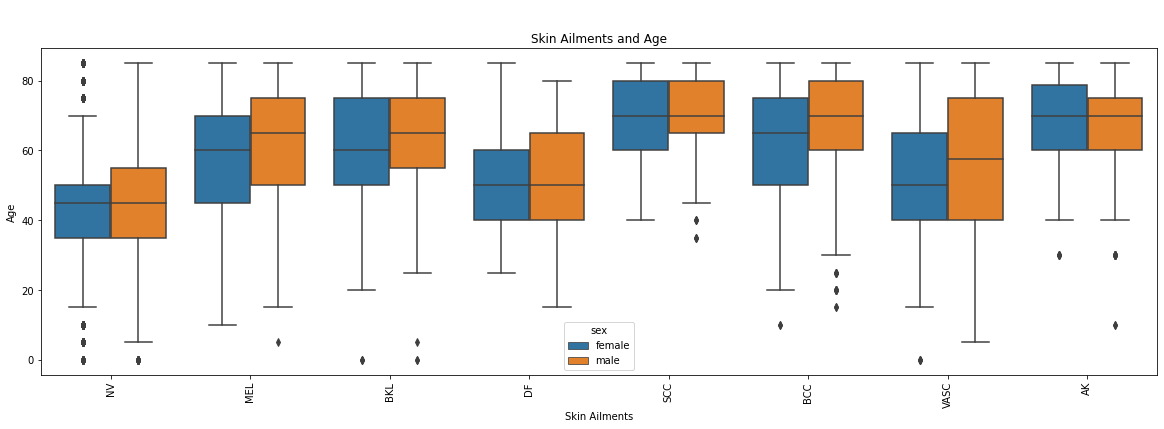

In [23]:
plt.figure(figsize=(20,6))
fig=sns.boxplot(x='target',y='age_approx',hue='sex',data=data)
plt.title('Skin Ailments and Age')
plt.xticks(rotation=90)
plt.xlabel('Skin Ailments')
plt.ylabel('Age')
#plt.ylim(0,7000)
#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height(),2) , (p.get_x()+0.15, p.get_height()+100),rotation=90)
plt.show()

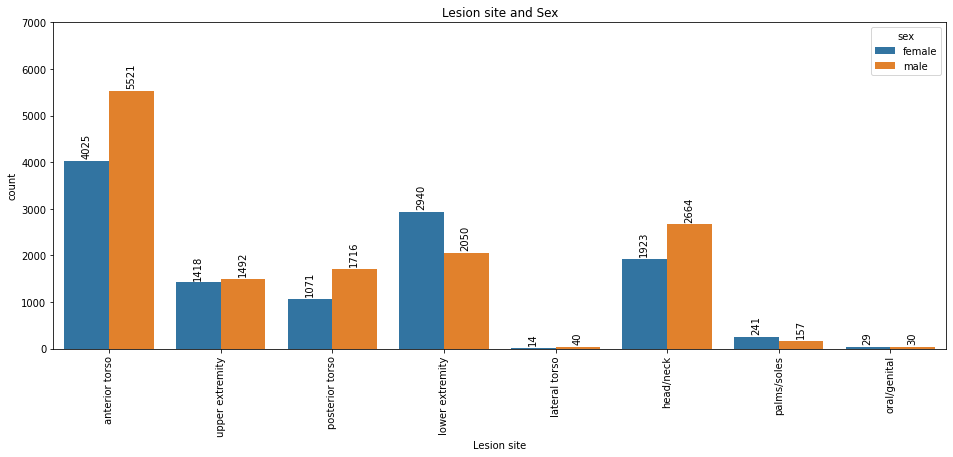

In [24]:
plt.figure(figsize=(16,6))
fig=sns.countplot(x='anatom_site_general',hue='sex',data=data)
plt.title('Lesion site and Sex')
plt.xlabel('Lesion site')
plt.xticks(rotation=90)
plt.ylim(0,7000)
#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height(),2) , (p.get_x()+0.15, p.get_height()+100),rotation=90)
plt.show()

NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: target, dtype: int64


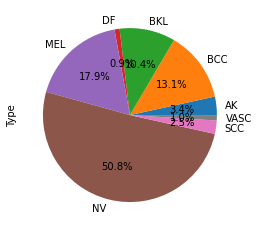

In [25]:
print(data["target"].value_counts())

data.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [26]:
data.describe(include=object)

,image,target,anatom_site_general,sex
count,25331,25331,25331,25331
unique,25331,8,8,2
top,ISIC_0000000,NV,anterior torso,male
freq,1,12875,9546,13670


**Downsampling**

In [27]:
data_DF = data[data["target"] == "DF"]
data_NV = data[data["target"] == "NV"]
data_MEL = data[data["target"] == "MEL"]
data_BKL= data[data["target"] == "BKL"]
data_BCC= data[data["target"] == "BCC"]
data_AK= data[data["target"] == "AK"]
data_VASC = data[data["target"] == "VASC"]
data_SCC =data[data["target"] == "SCC"]


In [28]:
from sklearn.utils import resample
data_NV = resample(data_NV,
             replace=True,
             n_samples=len(data_DF),
             random_state=42)
data_MEL = resample(data_MEL,
             replace=True,
             n_samples=len(data_DF),
             random_state=42)
data_BKL = resample(data_BKL,
             replace=True,
             n_samples=len(data_DF),
             random_state=42)
data_BCC = resample(data_BCC,
             replace=True,
             n_samples=len(data_DF),
             random_state=42)
data_AK = resample(data_AK,
             replace=True,
             n_samples=len(data_DF),
             random_state=42)
data_VASC = resample(data_VASC,
             replace=True,
             n_samples=len(data_DF),
             random_state=42)
data_SCC = resample(data_SCC,
             replace=True,
             n_samples=len(data_DF),
             random_state=42)

In [29]:
data_NV.describe(include=object)

,image,target,anatom_site_general,sex
count,239,239,239,239
unique,236,1,6,2
top,ISIC_0057722,NV,anterior torso,male
freq,2,239,97,123


DF      239
NV      239
MEL     239
BKL     239
BCC     239
AK      239
VASC    239
SCC     239
Name: target, dtype: int64


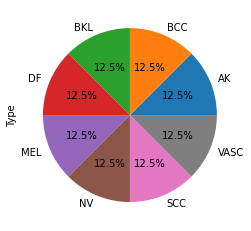

In [30]:
data_downsampled = pd.concat([data_DF, data_NV,data_MEL,data_BKL,data_BCC,data_AK,data_VASC,data_SCC])

print(data_downsampled["target"].value_counts())

data_downsampled.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [31]:
data_downsampled=data_downsampled.drop_duplicates()

In [32]:
data_downsampled.describe(include=object)

,image,target,anatom_site_general,sex
count,1713,1713,1713,1713
unique,1713,8,7,2
top,ISIC_0024318,DF,anterior torso,male
freq,1,239,495,945


In [33]:
data_downsampled['image_path']= data_downsampled['image']+'.jpg'

In [13]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
from PIL import Image
import numpy as np
np.asarray(Image.open('/content/drive/MyDrive/Selected/ISIC_0000089_downsampled.jpg'))

array([[[215, 173, 174],
        [215, 173, 174],
        [216, 174, 175],
        ...,
        [209, 170, 163],
        [208, 169, 162],
        [208, 169, 162]],

       [[215, 173, 174],
        [215, 173, 174],
        [216, 174, 175],
        ...,
        [208, 169, 162],
        [208, 169, 162],
        [207, 168, 161]],

       [[216, 174, 175],
        [216, 174, 175],
        [216, 174, 175],
        ...,
        [208, 169, 162],
        [207, 168, 161],
        [207, 168, 161]],

       ...,

       [[199, 170, 156],
        [199, 170, 156],
        [198, 169, 155],
        ...,
        [200, 172, 161],
        [200, 172, 161],
        [201, 173, 162]],

       [[199, 170, 156],
        [199, 170, 156],
        [199, 170, 156],
        ...,
        [200, 172, 161],
        [200, 172, 161],
        [200, 172, 161]],

       [[199, 170, 156],
        [199, 170, 156],
        [199, 170, 156],
        ...,
        [200, 172, 161],
        [200, 172, 161],
        [200, 172, 161]]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [42]:
from PIL import Image
data_downsampled['image_path1']='/content/drive/MyDrive/Selected/'+data_downsampled['image_path']
data_downsampled['images_array'] = data_downsampled['image_path1'].map(lambda x: np.asarray(Image.open(x).resize((128,128))))
data_downsampled.head()

,image,target,age_approx,anatom_site_general,sex,image_path,image_path1,images_array
2915,ISIC_0024318,DF,65.0,lower extremity,female,ISIC_0024318.jpg,/content/drive/MyDrive/Selected/ISIC_0024318.jpg,"[[[230, 176, 167], [231, 176, 169], [229, 172,..."
2927,ISIC_0024330,DF,40.0,lower extremity,male,ISIC_0024330.jpg,/content/drive/MyDrive/Selected/ISIC_0024330.jpg,"[[[182, 156, 188], [183, 157, 190], [181, 155,..."
2983,ISIC_0024386,DF,40.0,lower extremity,female,ISIC_0024386.jpg,/content/drive/MyDrive/Selected/ISIC_0024386.jpg,"[[[203, 116, 155], [205, 119, 157], [204, 119,..."
2993,ISIC_0024396,DF,65.0,lower extremity,female,ISIC_0024396.jpg,/content/drive/MyDrive/Selected/ISIC_0024396.jpg,"[[[189, 152, 158], [190, 154, 162], [192, 155,..."
3150,ISIC_0024553,DF,50.0,upper extremity,female,ISIC_0024553.jpg,/content/drive/MyDrive/Selected/ISIC_0024553.jpg,"[[[242, 183, 171], [243, 188, 178], [244, 187,..."


In [43]:
data_downsampled.drop(['image','age_approx','anatom_site_general','sex','image_path','image_path1'], axis=1, inplace=True)

In [44]:
data_downsampled.iloc[0]['images_array'].shape

(128, 128, 3)

In [45]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data_downsampled['target']= label_encoder.fit_transform(data_downsampled['target'])


In [46]:
y=data_downsampled['target']
x=data_downsampled.drop('target',axis=1)

In [47]:
x.shape

(1713, 1)

In [48]:
x = np.asarray(x['images_array'].tolist())

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,stratify=y,random_state=42)


In [50]:
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1370, 128, 128, 3)
y_train dataset:  (1370,)
X_test dataset:  (343, 128, 128, 3)
y_test dataset:  (343,)


In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

# Flattening the images from the 28x28 pixels to 1D 787 pixels
x_train = x_train.reshape(1370, 49152)
x_test = x_test.reshape(343, 49152)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')




In [52]:
# normalizing the data to help with the training
x_train /= 255
x_test /= 255

In [53]:
y_test=y_test.to_numpy()


In [54]:
y_train=y_train.to_numpy()


In [55]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 8
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (1370,)
Shape after one-hot encoding:  (1370, 8)


**Artificial Neural Network**

In [56]:


# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(49152,), activation='relu'))
# output layer
model.add(Dense(8, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=3, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4915300   
                                                                 
 dense_1 (Dense)             (None, 8)                 808       
                                                                 
Total params: 4,916,108
Trainable params: 4,916,108
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
11/11 [==============================] - 2s 120ms/step - loss: 34.3446 - accuracy: 0.1277 - val_loss: 14.3477 - val_accuracy: 0.1574
Epoch 2/3
11/11 [==============================] - 1s 102ms/step - loss: 9.1047 - accuracy: 0.1299 - val_loss: 4.6407 - val_accuracy: 0.1312
Epoch 3/3
11/11 [==============================] - 1s 95ms/step - loss: 3.6831 - accuracy: 0.1511 - val_loss: 2.7570 - val_accuracy: 0.1516


Convolutional Neural Network

In [1]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils


# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 128, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(1, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [2]:
model.fit(x_train, y_train, batch_size=250, epochs=3, validation_data=(x_test, y_test))

NameError: ignored

VGG Net

In [15]:
import torch
import torch.nn as nn

In [16]:
VGG_types = {
"VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
"VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
"VGG16": [64,64,"M",128,128,"M",256,256,256,"M",512,512,512,"M",512,512,512,"M",],
"VGG19": [64,64,"M",128,128,"M",256,256,256,256,"M",512,512,512,512,
          "M",512,512,512,512,"M",],}

In [17]:
VGGType = "VGG16"


In [62]:
class VGGnet(nn.Module):
    def __init__(self, in_channels=3, num_classes=1000):
        super(VGGnet, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types[VGGType])
        self.fcs = nn.Sequential(nn.Linear(512 * 7 * 7, 4096),nn.ReLU(),nn.Dropout(p=0.5),nn.Linear(4096, 4096),nn.ReLU(),nn.Dropout(p=0.5),nn.Linear(4096, num_classes),)

    def forward(self, x):
      x = self.conv_layers(x)
      x = x.reshape(x.shape[0], -1)
      x = self.fcs(x)
      return x

    def create_conv_layers(self, architecture):
      layers = []
      in_channels = self.in_channels
      for x in architecture:
        if type(x) == int:
          out_channels = x

          layers += [nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=(3, 3),stride=(1, 1),padding=(1, 1),),nn.BatchNorm2d(x),nn.ReLU(),]
          in_channels = x
        elif x == "M":
          layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

      return nn.Sequential(*layers)



In [63]:
if __name__ == "__main__":
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = VGGnet(in_channels=3, num_classes=500).to(device)
    # print(model)
    x = torch.randn(1, 3, 224, 224).to(device)
    print(model(x).shape)

torch.Size([1, 500])


In [64]:
print(model)


VGGnet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), 